In [ ]:
import matplotlib.pyplot as plt

# draw a line graph of tanh function start from 0

import numpy as np

x = np.linspace(0, 10, 100)
y = np.tanh(x)

plt.plot(x, y)
plt.show()

In [1]:
# make 1 - Gaussian distribution

import numpy as np

def inverseGaussian(x, mu, sigma):
    return 1 - (1./np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# make 1 - Laplace distribution

def inverseLaplace(x, mu, sigma):
    return 1 - (1./(2 * sigma)) * np.exp(-np.abs(x - mu) / sigma)

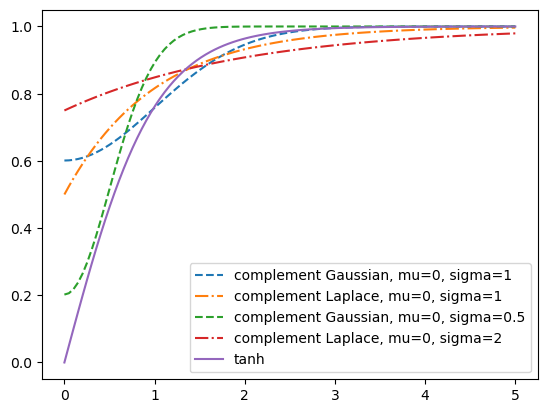

In [2]:
# draw a line graph of inverse Gaussian distribution and inverse Laplace distribution

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 100)

y1 = inverseGaussian(x, 0, 1)
y2 = inverseLaplace(x, 0, 1)
y3 = inverseGaussian(x, 0, 0.5)
y4 = inverseLaplace(x, 0, 2)
y5 = np.tanh(x)

# set color map to cold

plt.plot(x, y1, '--' , label='complement Gaussian, mu=0, sigma=1')
plt.plot(x, y2, '-.', label='complement Laplace, mu=0, sigma=1')
plt.plot(x, y3, '--', label='complement Gaussian, mu=0, sigma=0.5')
plt.plot(x, y4, '-.', label='complement Laplace, mu=0, sigma=2')
plt.plot(x, y5, label='tanh')
plt.legend()
plt.show()


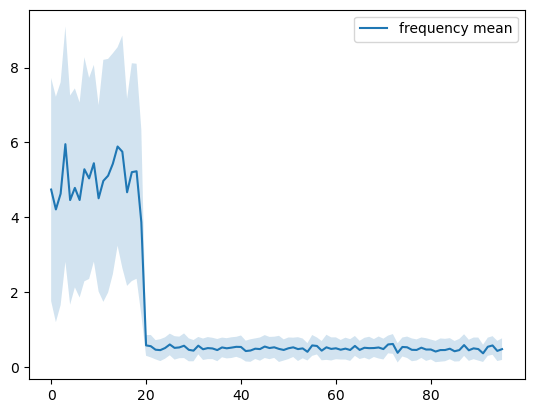

In [3]:
import numpy as np
import matplotlib.pyplot as plt

gt = np.random.rand(30, 96, 96, 96)
pre = np.random.rand(30, 96, 96, 96)

# scaling the value of small indexes higher
gt[:, :20, :20, :20] *= 10
pre[:, :20, :20, :20] *= 10

# gt2 = np.random.rand(3000, 96, 96, 96)
# pre2 = np.random.rand(3000, 96, 96, 96)

# scaling the value of small indexes higher
# gt2[:, :10, :10, :10] *= 5
# pre2[:, :10, :10, :10] *= 5

error = np.abs(gt - 0)
mean_error = np.mean(error, axis=0)
std_error = np.std(error, axis=0)

# error2 = np.abs(gt2 - pre2)
# mean_error2 = np.mean(error2, axis=0)
# std_error2 = np.std(error2, axis=0)

# draw a line graph of mean and standard deviation of error
# get diagonal line of error, such as error[0, 0, 0], error[1, 1, 1], error[2, 2, 2], ...
x = np.arange(96)
y = mean_error[x, x, x]
# y2 = mean_error2[x, x, x]

plt.plot(x, y, label='frequency mean')
plt.fill_between(x, y - std_error[x, x, x], y + std_error[x, x, x], alpha=0.2)
# plt.plot(x, y2, label='MSD frequency mean error')
# plt.fill_between(x, y2 - std_error2[x, x, x], y2 + std_error2[x, x, x], alpha=0.2)
plt.legend()
plt.show()


In [ ]:
fig = plt.figure(figsize=(20,10))
tensor_samples = input_concat.squeeze(1).to('cpu').numpy()
# shape (30,96,96,96)
tensor_samples = np.abs(np.fft.fftn(orgin, axes=(1, 2, 3)))


freq_x = np.fft.fftfreq(tensor_samples.shape[1])[:tensor_samples.shape[1] // 2]
freq_y = np.fft.fftfreq(tensor_samples.shape[2])[:tensor_samples.shape[2] // 2]
freq_z = np.fft.fftfreq(tensor_samples.shape[3])[:tensor_samples.shape[3] // 2]

# 양의 주파수 영역 추출
positive_freq_magnitudes = tensor_samples[:, :len(freq_x), :len(freq_y), :len(freq_z)]

# 평균 및 표준편차 계산
mean_magnitude = np.mean(positive_freq_magnitudes, axis=0).flatten()
std_magnitude = np.std(positive_freq_magnitudes, axis=0).flatten()

# 주파수 성분을 크기 순으로 정렬
freq_indices = np.array(np.meshgrid(freq_x, freq_y, freq_z, indexing='ij')).reshape(3, -1) # -->> 3 dimensions indices
freq_magnitudes = np.linalg.norm(freq_indices, axis=0)
sorted_indices = np.argsort(freq_magnitudes) # -->> sorted?
sorted_mean_magnitude = mean_magnitude[sorted_indices]
sorted_std_magnitude = std_magnitude[sorted_indices]

# 주파수 성분별로 낮은 주파수부터 높은 주파수까지 시각화
plt.figure(figsize=(14, 7))

plt.plot(sorted_mean_magnitude, label='Mean Magnitude')
plt.fill_between(range(len(sorted_mean_magnitude)),
                 sorted_mean_magnitude - sorted_std_magnitude,
                 sorted_mean_magnitude + sorted_std_magnitude,
                 color='lightcoral', alpha=0.8, label='±1 STD')

plt.yscale('symlog')
plt.title('Mean Magnitude with STD (Positive Frequencies)')
plt.xlabel('Frequency Component Index')
plt.ylabel('Magnitude (Log Scale)')
plt.legend()
plt.tight_layout()

C:\Users\user\AppData\Local\Temp\ipykernel_44132\4040348338.py:10: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (1./(2 ** (k / 2) * np.math.gamma(k / 2))) * x ** (k / 2 - 1) * np.exp(-x / 2)


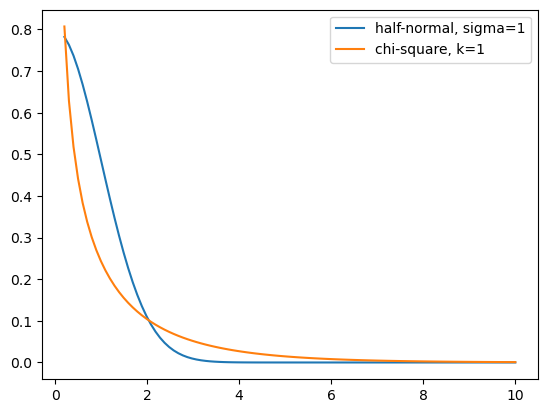

In [13]:
# draw haft-normal distribution and chi-square distribution

import numpy as np
import matplotlib.pyplot as plt

def half_normal(x, sigma):
    return np.sqrt(2 / np.pi) / sigma * np.exp(-x ** 2 / (2 * sigma ** 2))

def chi_square(x, k):
    return (1./(2 ** (k / 2) * np.math.gamma(k / 2))) * x ** (k / 2 - 1) * np.exp(-x / 2)



x = np.linspace(0.2, 10, 100)

y1 = half_normal(x, 1)
y2 = chi_square(x, 1)
y3 = chi_square(x, 2)

plt.plot(x, y1, label='half-normal, sigma=1')
plt.plot(x, y2, label='chi-square, k=1')
# plt.plot(x, y3, label='chi-square, k=2')
plt.legend()
plt.show()